In [2]:
import mysql.connector
import pandas as pd
import datetime
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import mysql_save_load
import datetime

In [3]:
mydb = mysql_save_load.connectDB("tim_test")
df = pd.read_sql( "SELECT * FROM pred" , con=mydb)
df_camp = pd.read_sql( "SELECT * FROM by_campaign", con=mydb)

## 10/17

In [5]:
YESTERDAY = datetime.datetime.now().date() - datetime.timedelta(1)

In [6]:
df['date'] = df['request_time'].dt.date
df_camp['date'] = df_camp['request_time'].dt.date

In [7]:
df_pred = df[ (df.ad_id == 23842869152850246) & (df.date == YESTERDAY) ].reset_index()

In [8]:
df_pred.head(3)

,index,ad_id,request_time,pred_cpc,pred_budget,date
0,1911,23842869152850246,2018-10-17 08:30:10,6.0,300,2018-10-17
1,1913,23842869152850246,2018-10-17 08:31:11,6.0,300,2018-10-17
2,1915,23842869152850246,2018-10-17 08:32:10,6.0,300,2018-10-17


In [9]:
df_real = df_camp[ (df_camp.ad_id == 23842869152850246) & (df_camp.date == YESTERDAY) ].reset_index()

In [11]:
df_real.head(3)

,index,ad_id,cpc,clicks,impressions,reach,campaign_id,spend_cap,objective,start_time,stop_time,adset_id,bid_amount,daily_budget,request_time,total_clicks,date
0,30634,23842869152850246,0.0,0,1,1,23842866254190246,None,LINK_CLICKS,2018-07-01 09:00:10,2018-11-30 23:59:00,23842866254290246,9,300,2018-10-18 00:32:09,12000.0,2018-10-18
1,30637,23842869152850246,0.0,0,1,1,23842866254190246,None,LINK_CLICKS,2018-07-01 09:00:10,2018-11-30 23:59:00,23842866254290246,9,300,2018-10-18 00:33:10,12000.0,2018-10-18
2,30641,23842869152850246,0.0,0,1,1,23842866254190246,None,LINK_CLICKS,2018-07-01 09:00:10,2018-11-30 23:59:00,23842866254290246,9,300,2018-10-18 00:34:11,12000.0,2018-10-18


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

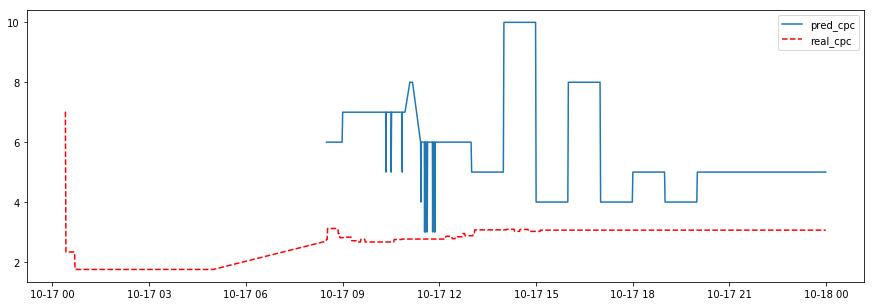

In [26]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred.request_time, df_pred['pred_cpc'], label='pred_cpc' )
plt.plot( df_real.request_time, df_real['cpc'], 'r--', label='real_cpc' )
plt.legend(loc='upper right')

In [19]:
df_pred[['pred_cpc', 'pred_budget']].astype(float)
df_pred['clicks'] = df_pred['pred_budget'] / df_pred['pred_cpc']

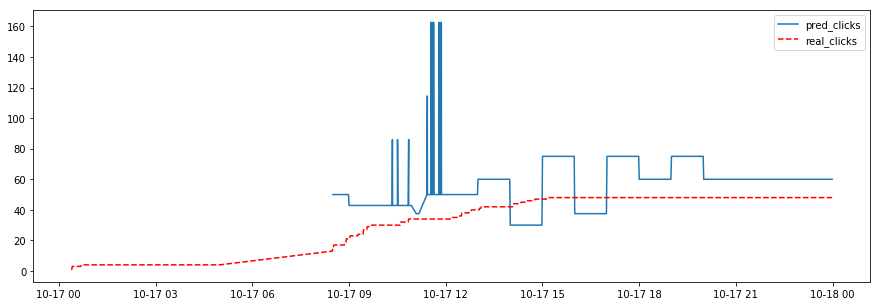

In [27]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred.request_time, df_pred['clicks'], label='pred_clicks' )
plt.plot( df_real.request_time, df_real['clicks'], 'r--', label='real_clicks' )
plt.legend(loc='upper right')

In [42]:
df_real[['cpc', 'clicks']].astype(float)
df_real['spend'] = df_real['cpc'] * df_real['clicks']

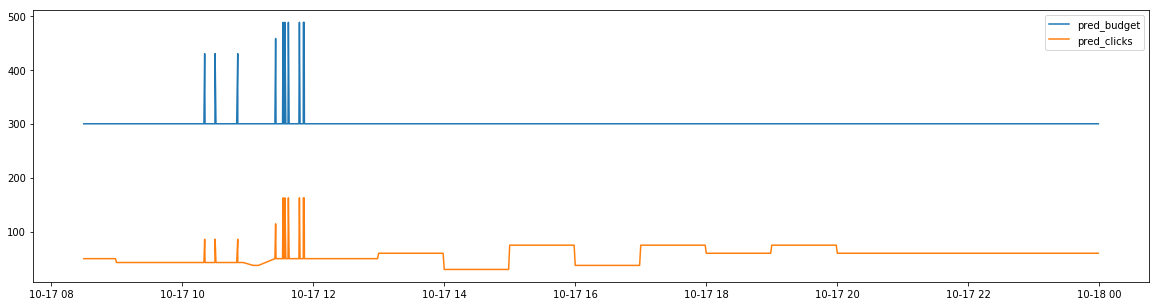

In [25]:
fig = plt.figure(figsize=(20, 5))
# plt.plot( df_pred.request_time, df_pred['pred_cpc'], label='pred_cpc' )
plt.plot( df_pred.request_time, df_pred['pred_budget'], label='pred_budget' )
plt.plot( df_pred.request_time, df_pred['clicks'], label='pred_clicks' )
plt.legend(loc='upper right')

In [ ]:
fig = plt.figure(figsize=(20, 5))


In [ ]:
23842974131850246, 23842869152870246, 23842869152850246

In [26]:
datetime.datetime.now() - datetime.timedelta(1)

datetime.datetime(2018, 10, 17, 10, 7, 22, 912557)

## 10/18

In [6]:
df['date'] = df['request_time'].dt.date
df_camp['date'] = df_camp['request_time'].dt.date

In [28]:
TODAY = datetime.datetime.today().date()

In [29]:
df_pred = df[ (df.ad_id == 23842869152850246) & (df.date == TODAY) ].reset_index()

In [30]:
df_real = df_camp[ (df_camp.ad_id == 23842869152850246) & (df_camp.date == TODAY) ].reset_index()

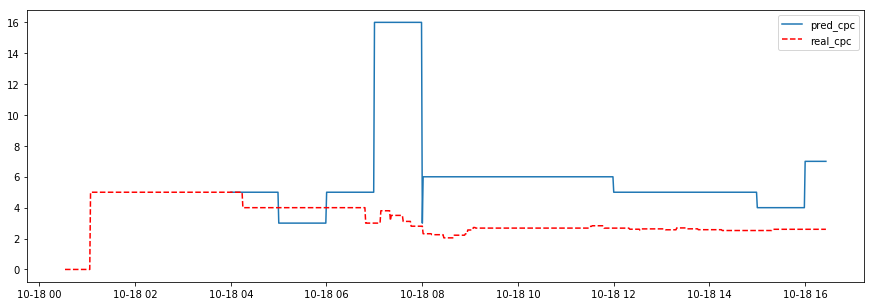

In [31]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred.request_time, df_pred['pred_cpc'], label='pred_cpc' )
plt.plot( df_real.request_time, df_real['cpc'], 'r--', label='real_cpc' )
plt.legend(loc='upper right')

In [33]:
df_pred[['pred_cpc', 'pred_budget']].astype(float)
df_pred['clicks'] = df_pred['pred_budget'] / df_pred['pred_cpc']

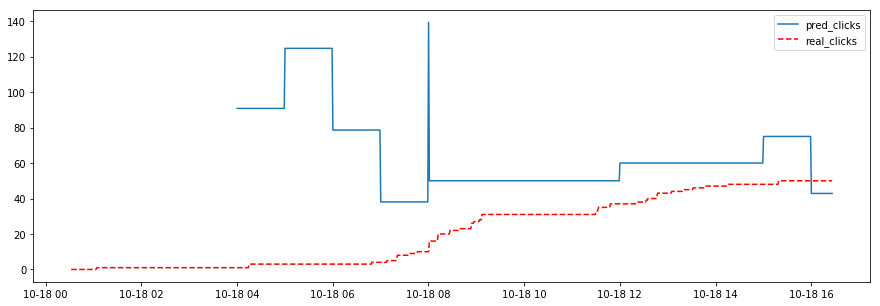

In [34]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred.request_time, df_pred['clicks'], label='pred_clicks' )
plt.plot( df_real.request_time, df_real['clicks'], 'r--', label='real_clicks' )
plt.legend(loc='upper right')